# PINT Example Session

The PINT homepage is at:  https://github.com/nanograv/PINT.

The documentation is availble here: https://nanograv-pint.readthedocs.io/en/latest/index.html

PINT can be run via a Python script, in an interactive session with ipython or jupyter, or using one of the command-line tools provided.

## Times of Arrival (TOAs)

The raw data for PINT are TOAs, which can be read in from files in a variety of formats, or constructed programatically. PINT currently can read TEMPO, Tempo2, and ITOA text files, as well as a range of spacecraft FITS format event files (e.g. Fermi "FT1" and NICER .evt files).

Note:  The first time TOAs get read in, lots of processing (can) happen, which can take some time. However, a  "pickle" file can be saved, so the next time the same file is loaded (if nothing has changed), the TOAs will be loaded from the pickle file, which is much faster.

In [1]:
import tempfile
import astropy.units as u
from pprint import pprint
from glob import glob
import pint.logging

# setup the logging
# let's have it give less detail
pint.logging.setup(level="WARNING")

1

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Turn on quantity support for plotting. This is very helpful!
from astropy.visualization import quantity_support

quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fd74deaaa10>

In [3]:
# Here is how to create a single TOA in Python
# The first argument is an MJD(UTC) as a 2-double tuple to allow extended precision
# and the second argument is the TOA uncertainty
# Wherever possible, it is good to use astropy units on the values,
# but there are sensible defaults if you leave them out (us for uncertainty, MHz for freq)
import pint.toa as toa

a = toa.TOA(
    (54567, 0.876876876876876),
    4.5 * u.us,
    freq=1400.0 * u.MHz,
    obs="GBT",
    backend="GUPPI",
    name="guppi_56789.fits",
)
print(a)

54567.8768768768768759:  4.500 us error at 'gbt' at 1400.0000 MHz {'backend': 'GUPPI', 'name': 'guppi_56789.fits'}


In [4]:
# An example of reading a TOA file
import pint.toa as toa
import pint.config

# maybe we want extra logging info here to see what happens when we load TOAs
pint.logging.setup(level="DEBUG")
t = toa.get_TOAs(pint.config.examplefile("NGC6440E.tim"), ephem="DE440")
# but then turn back to "WARNING" later
pint.logging.setup(level="WARNING")

DEBUG    (pint.toa                      ): No pulse number flags found in the TOAs


DEBUG    (pint.toa                      ): Applying clock corrections (include_gps = True, include_bipm = True)


INFO     (pint.observatory              ): Applying GPS to UTC clock correction (~few nanoseconds)


INFO     (pint.observatory              ): Loading global GPS clock file


DEBUG    (pint.observatory.clock_file   ): Global clock file gps2utc.clk saving kwargs={'bogus_last_correction': False, 'valid_beyond_ends': False}


DEBUG    (pint.observatory.clock_file   ): Loading TEMPO2-format observatory clock correction file gps2utc.clk (/home/docs/.astropy/cache/download/url/d3c81b5766f4bfb84e65504c8a453085/contents) with bogus_last_correction=False


INFO     (pint.observatory              ): Using global clock file for gps2utc.clk with bogus_last_correction=False


INFO     (pint.observatory              ): Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)


INFO     (pint.observatory              ): Loading BIPM clock version bipm2021


DEBUG    (pint.observatory.clock_file   ): Global clock file tai2tt_bipm2021.clk saving kwargs={'bogus_last_correction': False, 'valid_beyond_ends': False}


DEBUG    (pint.observatory.clock_file   ): Loading TEMPO2-format observatory clock correction file tai2tt_bipm2021.clk (/home/docs/.astropy/cache/download/url/e00edeef4edde217d65207a9abeb6a8c/contents) with bogus_last_correction=False


INFO     (pint.observatory              ): Using global clock file for tai2tt_bipm2021.clk with bogus_last_correction=False


DEBUG    (pint.observatory.clock_file   ): Global clock file time_gbt.dat saving kwargs={'bogus_last_correction': False, 'valid_beyond_ends': False}


DEBUG    (pint.observatory.clock_file   ): Loading TEMPO-format observatory clock correction file time_gbt.dat (/home/docs/.astropy/cache/download/url/599e3ebbfc317e090244ee1ef4c79374/contents) with bogus_last_correction=False


INFO     (pint.observatory              ): Using global clock file for time_gbt.dat with bogus_last_correction=False


INFO     (pint.observatory.topo_obs     ): Applying observatory clock corrections for observatory='gbt'.


DEBUG    (pint.toa                      ): Computing TDB columns.


DEBUG    (pint.toa                      ): Using EPHEM = DE440 for TDB calculation.


DEBUG    (pint.toa                      ): Computing PosVels of observatories and Earth, using DE440


INFO     (pint.solar_system_ephemerides ): Set solar system ephemeris to de440 through astropy


DEBUG    (pint.toa                      ): SSB obs pos [-1.31656418e+11 -6.52210907e+10 -2.82886126e+10] m


DEBUG    (pint.toa                      ): Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos


3

In [5]:
#  You can print a summary of the loaded TOAs
t.print_summary()

Number of TOAs:  62
Number of commands:  0
Number of observatories: 1 ['gbt']
MJD span:  53478.286 to 54187.587
Date span: 2005-04-18 06:51:39.290648106 to 2007-03-28 14:05:44.808308037
gbt TOAs (62):
  Min freq:      1549.609 MHz
  Max freq:      2212.109 MHz
  Min error:     13.2 us
  Max error:     118 us
  Median error:  22.1 us



In [6]:
# The get_mjds() method returns an array of the MJDs for the TOAs
# Here is the MJD of the first TOA. Notice that is has the units of days
pprint(t.get_mjds())

<Quantity [53478.28587142, 53483.27670519, 53489.46838979, 53679.87564592,
           53679.87564537, 53679.87564493, 53679.87564458, 53679.87564513,
           53681.700751  , 53681.9545449 , 53683.73678777, 53685.73745904,
           53687.68639838, 53687.95032739, 53690.8505221 , 53695.69557327,
           53695.85890789, 53700.71983242, 53700.86649642, 53709.63751695,
           53709.80961233, 53740.56747467, 53740.77459869, 53801.3860512 ,
           53801.59143301, 53833.2978103 , 53833.50245772, 53843.33207938,
           53865.18476778, 53865.37595138, 53895.11283426, 53895.3234694 ,
           53920.05274172, 53920.23971474, 53954.97216082, 53955.17456176,
           53980.90304181, 53981.11981343, 54010.82143311, 54011.03176787,
           54050.70474316, 54050.94624708, 54093.65660523, 54095.65330737,
           54098.6648706 , 54099.70978479, 54148.68651943, 54150.42513338,
           54151.52682219, 54152.71744732, 54153.54858413, 54160.52286339,
           54187.33158349

TOAs are stored in a [Astropy Table](https://astropy.readthedocs.org/latest/table/)  in an instance of the TOAs class.

In [7]:
# List the table columns, which include pre-computed TDB times and
# solar system positions and velocities
t.table.colnames

['index',
 'mjd',
 'mjd_float',
 'error',
 'freq',
 'obs',
 'flags',
 'delta_pulse_number',
 'tdb',
 'tdbld',
 'ssb_obs_pos',
 'ssb_obs_vel',
 'obs_sun_pos']

Lots of cool things that tables can do...

In [8]:
# This pops open a browser window showing the contents of the table
# t.table.show_in_browser()

Can do fancy sorting, selecting, re-arranging very easily.

In [9]:
select = t.get_errors() < 20 * u.us
print(select)

[False False False False False False False  True False False False False
 False False  True False  True False False False  True False  True False
  True  True  True  True False  True False  True  True  True False False
 False False False False False False  True  True False  True  True False
 False False  True False False False False False False False False False
 False False]


In [10]:
pprint(t.table["tdb"][select])

<Column name='tdb' dtype='object' length=18>
 53679.87638798794
 53690.85126495607
 53695.85965074819
 53709.81035518692
53740.775353131845
 53801.59218746964
  53833.2985647664
 53833.50321218054
 53843.33283383857
 53865.37670583518
 53895.32422385059
 53920.05349616944
53920.240469182434
 54093.65735966989
 54095.65406181057
 54099.71053923451
  54148.6872738913
 54153.54933858948


TOAs objects have a select() method to select based on a boolean mask. This selection can be undone later with unselect.

In [11]:
t.print_summary()
t.select(select)
t.print_summary()
t.unselect()
t.print_summary()

Number of TOAs:  62
Number of commands:  0
Number of observatories: 1 ['gbt']
MJD span:  53478.286 to 54187.587
Date span: 2005-04-18 06:51:39.290648106 to 2007-03-28 14:05:44.808308037
gbt TOAs (62):
  Min freq:      1549.609 MHz
  Max freq:      2212.109 MHz
  Min error:     13.2 us
  Max error:     118 us
  Median error:  22.1 us

Number of TOAs:  18
Number of commands:  0
Number of observatories: 1 ['gbt']
MJD span:  53679.876 to 54153.549
Date span: 2005-11-05 21:00:55.739565465 to 2007-02-22 13:09:57.668850184
gbt TOAs (18):
  Min freq:      1949.609 MHz
  Max freq:      1949.609 MHz
  Min error:     13.2 us
  Max error:     19.6 us
  Median error:  16.4 us

Number of TOAs:  62
Number of commands:  0
Number of observatories: 1 ['gbt']
MJD span:  53478.286 to 54187.587
Date span: 2005-04-18 06:51:39.290648106 to 2007-03-28 14:05:44.808308037
gbt TOAs (62):
  Min freq:      1549.609 MHz
  Max freq:      2212.109 MHz
  Min error:     13.2 us
  Max error:     118 us
  Median error:  

PINT routines / classes / functions use [Astropy Units](https://astropy.readthedocs.org/latest/units/) internally and externally as much as possible:

In [12]:
pprint(t.get_errors())

<Quantity [ 21.71,  21.95,  29.95,  25.46,  23.43,  31.67,  30.26,  13.52,
            21.64,  27.41,  24.58,  23.52,  21.71,  21.47,  17.72,  28.88,
            14.63,  38.03,  31.47,  33.26,  13.88,  26.89,  18.29,  21.48,
            17.88,  18.59,  19.03,  15.07,  21.58,  14.72,  25.14,  14.65,
            19.29,  13.25,  20.71,  23.57,  23.45,  22.16,  23.53,  21.01,
            21.66,  75.3 ,  19.65,  16.28,  21.93,  14.  ,  19.35,  32.92,
            33.83, 118.43,  16.45,  30.18,  21.8 ,  20.75,  32.75,  31.29,
            37.13,  37.4 ,  35.24,  50.83,  38.43,  48.59] us>


The times in each row contain (or are derived from) [Astropy Time](https://astropy.readthedocs.org/latest/time/) objects:

In [13]:
toa0 = t.table["mjd"][0]

In [14]:
toa0.tai

<Time object: scale='tai' format='pulsar_mjd' value=53478.28624178991>

But the most useful timescale, TDB is also stored in its own column as a long double numpy array, to maintain precision and keep from having to redo the conversion.
*Note that is is the TOA time converted to the TDB timescale, but the Solar System delays have not been applied, so this is NOT what people call "barycentered times"*

In [15]:
pprint(t.table["tdbld"][:3])

<Column name='tdbld' dtype='float128' length=3>
53478.286614308378393
53483.277448077169023
53489.469132675783516


## Timing Models

Now let's define and load a timing model

In [16]:
import pint.models as models

m = models.get_model(pint.config.examplefile("NGC6440E.par"))

In [17]:
# Printing a model gives the parfile representation
print(m)

# Created: 2024-05-17T07:23:36.033319
# PINT_version: 1.0+106.g56dbd30
# User: docs
# Host: build-24408004-project-85767-nanograv-pint
# OS: Linux-5.19.0-1028-aws-x86_64-with-glibc2.35
# Python: 3.11.6 (main, Feb  1 2024, 16:47:41) [GCC 11.4.0]
# Format: pint
PSR                            1748-2021E
EPHEM                               DE421
CLK                          TT(BIPM2019)
UNITS                                 TDB
TIMEEPH                              FB90
T2CMETHOD                        IAU2000B
DILATEFREQ                              N
DMDATA                                  N
NTOA                                    0
RAJ                     17:48:52.75000000 1 0.04999999999999999584
DECJ                   -20:21:29.00000000 1 0.40000000000000002220
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
POSEPOCH           53750.0000000000000000
F0                           61.485476554 1 5e-10
F1        

Timing models are composed of "delay" terms and "phase" terms, which are computed by the Components of the model. The delay terms are evaluated in order, going from terms local to the Solar System, which are needed for computing 'barycenter-corrected' TOAs, through terms for the binary system.

In [18]:
# delay_funcs lists all the delay functions in the model, and the order is important!
m.delay_funcs

[<bound method Astrometry.solar_system_geometric_delay of AstrometryEquatorial(
     MJDParameter(   POSEPOCH            53750.0000000000000000 (d) frozen=True),
     floatParameter( PX                  0.0               (mas) frozen=True),
     AngleParameter( RAJ                 17:48:52.75000000 (hourangle) +/- 0h00m00.05s frozen=False),
     AngleParameter( DECJ                -20:21:29.00000000 (deg) +/- 0d00m00.4s frozen=False),
     floatParameter( PMRA                0.0               (mas / yr) frozen=True),
     floatParameter( PMDEC               0.0               (mas / yr) frozen=True))>,
 <bound method TroposphereDelay.troposphere_delay of TroposphereDelay(
     boolParameter(  CORRECT_TROPOSPHERE N                 frozen=True))>,
 <bound method SolarSystemShapiro.solar_system_shapiro_delay of SolarSystemShapiro(
     boolParameter(  PLANET_SHAPIRO      N                 frozen=True))>,
 <bound method SolarWindDispersion.solar_wind_delay of SolarWindDispersion(
     float

The phase functions include the spindown model and an absolute phase definition (if the TZR parameters are specified).

In [19]:
# And phase_funcs holds a list of all the phase functions
m.phase_funcs

[<bound method Spindown.spindown_phase of Spindown(
     floatParameter( F0                  61.485476554      (Hz) +/- 5e-10 Hz frozen=False),
     MJDParameter(   PEPOCH              53750.0000000000000000 (d) frozen=True),
     floatParameter( F1                  -1.181e-15        (Hz / s) +/- 1e-18 Hz / s frozen=False))>]

You can easily show/compute individual terms...

In [20]:
ds = m.solar_system_shapiro_delay(t)
pprint(ds)

<Quantity [-4.11774615e-06, -4.58215733e-06, -5.09435415e-06,
            1.26025166e-05,  1.26025164e-05,  1.26025162e-05,
            1.26025160e-05,  1.26025163e-05,  1.34033282e-05,
            1.35163227e-05,  1.43416919e-05,  1.53159181e-05,
            1.63198995e-05,  1.64587639e-05,  1.80783671e-05,
            2.11530227e-05,  2.12647452e-05,  2.49851393e-05,
            2.51080759e-05,  3.45107578e-05,  3.47450146e-05,
            3.00319035e-05,  2.98083009e-05,  2.11804876e-06,
            2.07541048e-06, -3.00762925e-06, -3.03173087e-06,
           -4.09655364e-06, -5.80849733e-06, -5.81983363e-06,
           -6.90339229e-06, -6.90646307e-06, -6.82672804e-06,
           -6.82292820e-06, -5.19141699e-06, -5.17650521e-06,
           -2.63564143e-06, -2.60880558e-06,  2.28385789e-06,
            2.32788087e-06,  1.51692739e-05,  1.52882687e-05,
            5.13321680e-05,  4.61456318e-05,  3.99876478e-05,
            3.82020217e-05,  6.59654820e-06,  6.09155453e-06,
        

The `get_mjds()` method can return the TOA times as either astropy Time objects (for high precision), or as double precisions Quantities (for easy plotting).

Text(0, 0.5, 'Solar System Shapiro Delay ($\\mu$s)')

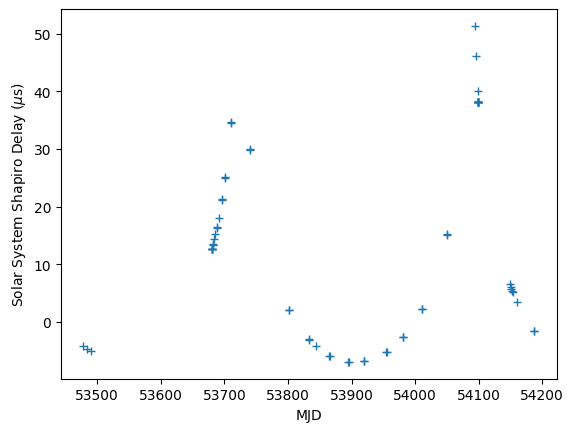

In [21]:
plt.plot(t.get_mjds(high_precision=False), ds.to(u.us), "+")
plt.xlabel("MJD")
plt.ylabel("Solar System Shapiro Delay ($\mu$s)")

Here are all of the terms added together:

In [22]:
pprint(m.delay(t))

<Quantity [-256.27796452, -292.17743481, -333.75112984,  357.1520691 ,
            357.10408427,  357.06636421,  357.03617705,  357.08413648,
            367.69372882,  369.13822873,  379.08005434,  389.80438944,
            399.79826793,  401.11625247,  415.02771298,  435.8981066 ,
            436.5464231 ,  454.24090015,  454.72529413,  478.04191824,
            478.38369877,  468.46391764,  467.91545254,   94.36835601,
             92.628911  , -175.81800261, -177.4654317 , -253.52926427,
           -394.2164241 , -395.23707448, -497.24016588, -497.540425  ,
           -488.57121649, -488.17791764, -337.19445584, -335.91562337,
           -146.57400016, -144.80615177,  105.78789561,  107.54212818,
            389.24573948,  390.51810899,  490.40905135,  488.47319094,
            484.41349149,  482.68725532,  240.08971331,  226.85700881,
            218.50175843,  209.24129419,  202.56724193,  146.32198475,
            -81.97904962,  -84.14626638,  482.76923444,  482.74204028,
      

In [23]:
pprint(m.phase(t))

Phase(int=<Quantity [-1.71639818e+09, -1.68988294e+09, -1.65698802e+09,
           -6.45521434e+08, -6.45521434e+08, -6.45521434e+08,
           -6.45521434e+08, -6.45521434e+08, -6.35826494e+08,
           -6.34478342e+08, -6.25011064e+08, -6.14383467e+08,
           -6.04030643e+08, -6.02628642e+08, -5.87222662e+08,
           -5.61485361e+08, -5.60617711e+08, -5.34795890e+08,
           -5.34016790e+08, -4.87423535e+08, -4.86509326e+08,
           -3.23112273e+08, -3.22011925e+08,  0.00000000e+00,
            1.09116600e+06,  1.69542892e+08,  1.70630151e+08,
            2.22853171e+08,  3.38950845e+08,  3.39966541e+08,
            4.97945399e+08,  4.99064384e+08,  6.30434263e+08,
            6.31427504e+08,  8.15928963e+08,  8.17004108e+08,
            9.53671033e+08,  9.54822490e+08,  1.11259234e+09,
            1.11370960e+09,  1.32444882e+09,  1.32573169e+09,
            1.55261772e+09,  1.56322501e+09,  1.57922372e+09,
            1.58477477e+09,  1.84497101e+09,  1.85420794e+09

## Residuals

In [24]:
import pint.residuals

In [25]:
rs = pint.residuals.Residuals(t, m)

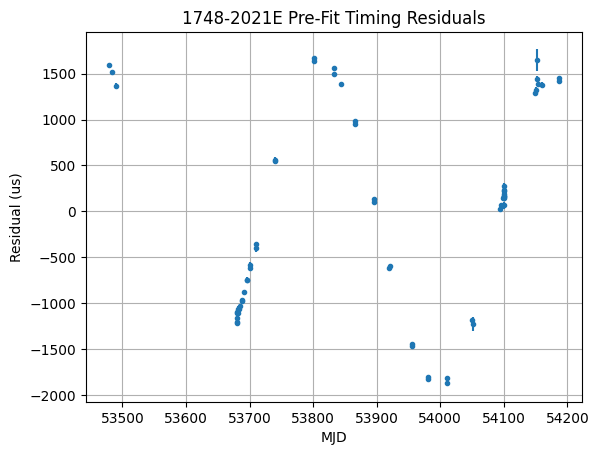

In [26]:
# Note that the Residuals object contains a toas member that has the TOAs used to compute
# the residuals, so you can use that to get the MJDs and uncertainties for each TOA
# Also note that plotting astropy Quantities must be enabled using
# astropy quanity_support() first (see beginning of this notebook)
plt.errorbar(
    rs.toas.get_mjds(),
    rs.time_resids.to(u.us),
    yerr=rs.toas.get_errors().to(u.us),
    fmt=".",
)
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (us)")
plt.grid()

## Fitting and Post-Fit residuals

The fitter is *completely* separate from the model and the TOA code.  So you can use any type of fitter with some easy coding to create a new subclass of `Fitter`.  This example uses PINT's Weighted Least Squares fitter. The return value for this fitter is the chi^2 after the fit.

In [27]:
import pint.fitter

f = pint.fitter.WLSFitter(t, m)
f.fit_toas()  # fit_toas() returns the final reduced chi squared

59.574367185473236685

In [28]:
# You can now print a nice human-readable summary of the fit
f.print_summary()

Fitted model using weighted_least_square method with 5 free parameters to 62 TOAs
Prefit residuals Wrms = 1090.793040947669 us, Postfit residuals Wrms = 21.18204717945037 us
Chisq = 59.574 for 56 d.o.f. for reduced Chisq of 1.064

PAR                        Prefit                  Postfit            Units
=================== ==================== ============================ =====
PSR                           1748-2021E 1748-2021E                   None
EPHEM                              DE421 DE440                        None
CLOCK                       TT(BIPM2019) TT(BIPM2021)                 None
UNITS                                TDB TDB                          None
START                                                         53478.3 d 
FINISH                                                        54187.6 d 
TIMEEPH                             FB90 FB90                         None
T2CMETHOD                       IAU2000B IAU2000B                     None
DILATEFREQ           

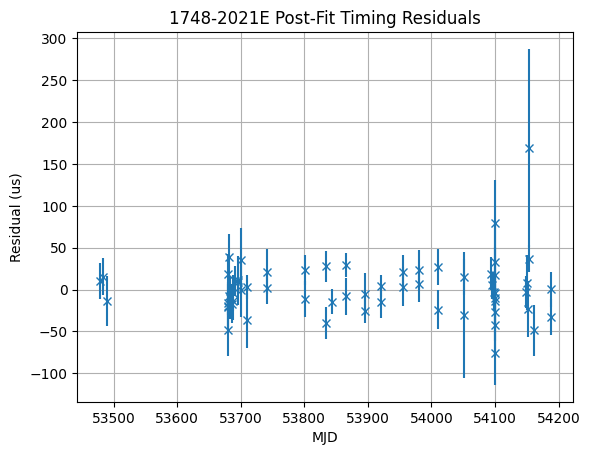

In [29]:
# Lets plot the post-fit residuals
plt.errorbar(
    t.get_mjds(), f.resids.time_resids.to(u.us), t.get_errors().to(u.us), fmt="x"
)
plt.title(f"{m.PSR.value} Post-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (us)")
plt.grid()

Now let's save (and print) the post-fit par file. We'll request a more TEMPO2-compatible file, though we could have requested a more TEMPO-style file or a more native PINT format. These differ only slightly, just as much as needed to be read by the three pieces of software. PINT can read all three variants.

In [30]:
f.model.write_parfile("/tmp/output.par", format="tempo2")
print(f.model.as_parfile(format="tempo2"))

# Created: 2024-05-17T07:23:37.222039
# PINT_version: 1.0+106.g56dbd30
# User: docs
# Host: build-24408004-project-85767-nanograv-pint
# OS: Linux-5.19.0-1028-aws-x86_64-with-glibc2.35
# Python: 3.11.6 (main, Feb  1 2024, 16:47:41) [GCC 11.4.0]
# Format: tempo2
MODE 1
PSR                            1748-2021E
EPHEM                               DE440
CLK                          TT(BIPM2021)
UNITS                                 TDB
START              53478.2858714195382639
FINISH             54187.5873241702319097
TIMEEPH                              FB90
#T2CMETHOD                        IAU2000B
DILATEFREQ                              N
DMDATA          0
NTOA                                   62
CHI2                   59.574367185473236
CHI2R                  1.0638279854548793
TRES                21.182047179450373357
RAJ                     17:48:52.80035401 1 0.00013524660895673345
DECJ                   -20:21:29.38334163 1 0.03285153305570393673
PMRA                            

## Other interesting things

We can make Barycentered TOAs in a single line, if you have a model and a TOAs object! These are TDB times with the Solar System delays applied (precisely which of the delay components are applied is changeable -- the default applies all delays before the ones associated with the binary system)

In [31]:
pprint(m.get_barycentric_toas(t))

<Quantity [53478.28958049, 53483.28082976, 53489.47299554, 53679.87225507,
           53679.87225507, 53679.87225507, 53679.87225507, 53679.87225507,
           53681.69723814, 53681.95101532, 53683.73314312, 53685.73369027,
           53687.68251394, 53687.9464277 , 53690.84646139, 53695.69127101,
           53695.85459813, 53700.71531786, 53700.86197625, 53709.63272692,
           53709.80481834, 53740.56280708, 53740.76993744, 53801.38571344,
           53801.59111538, 53833.3005997 , 53833.50526618, 53843.33576821,
           53865.19008493, 53865.38128034, 53895.11934381, 53895.32998242,
           53920.05915093, 53920.24611939, 53954.97681797, 53955.1792041 ,
           53980.90549269, 53981.12224386, 54010.82096314, 54011.0312776 ,
           54050.70099243, 54050.94248163, 54093.65168364, 54095.64840819,
           54098.6600184 , 54099.70495258, 54148.68449508, 54150.42326217,
           54151.5250477 , 54152.71578   , 54153.54699406, 54160.52192431,
           54187.33328679

Let's export the clock corrections as they currently stand so we can save
these exact versions for reproducibility purposes.


In [32]:
import pint.observatory.topo_obs

d = tempfile.mkdtemp()
pint.observatory.topo_obs.export_all_clock_files(d)
for f in sorted(glob(f"{d}/*")):
    print(f)

/tmp/tmponde9804/gps2utc.clk
/tmp/tmponde9804/tai2tt_bipm2021.clk
